In [ ]:
# === Import library utama ===
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from google.colab import drive
from tqdm import tqdm

In [ ]:
# === Mount Google Drive ===
drive.mount('/content/drive')

# === Tentukan path dataset ===
dataset_path = '/content/drive/MyDrive/dataset/Fruit-360_100x100/'

Mounted at /content/drive


In [ ]:
# === Fungsi Ekstraksi Histogram RGB ===
def extract_rgb_histogram(image_path, bins=8):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (100, 100))
    hist = cv2.calcHist([img], [0,1,2], None, [bins, bins, bins], [0,256]*3)
    hist = cv2.normalize(hist, hist).flatten()
    return hist

In [ ]:
# === Load gambar dan ekstrak fitur ===
def load_dataset(bins=8):
    image_paths, features, labels = [], [], []
    for label in sorted(os.listdir(dataset_path)):
        class_dir = os.path.join(dataset_path, label)
        if os.path.isdir(class_dir):
            for file in tqdm(os.listdir(class_dir), desc=f"Memuat {label}"):
                if file.lower().endswith(('.jpg', '.png', '.jpeg')):
                    path = os.path.join(class_dir, file)
                    feat = extract_rgb_histogram(path, bins=bins)
                    image_paths.append(path)
                    features.append(feat)
                    labels.append(label)
    # === jumlah kelas ===
    print(f"Total kelas: {len(np.unique(labels))}")
    print("Daftar kelas:", np.unique(labels))
    return np.array(features), np.array(labels), image_paths

In [ ]:
# === Fungsi pelatihan KNN dan evaluasi model ===
def train_and_evaluate_KNN(features, labels, image_paths, k=5, weighted=True):
    X_train, X_test, y_train, y_test, _, paths_test = train_test_split(
        features, labels, image_paths, test_size=0.2, stratify=labels, random_state=42)

    weight_type = 'distance' if weighted else 'uniform'
    knn = KNeighborsClassifier(n_neighbors=k, weights=weight_type)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n📌 K = {k}, Bins = {round(features.shape[1]**(1/3))}, Weights: {weight_type}")
    print(f"🎯 Akurasi: {accuracy*100:.2f}%")
    print("📊 Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n📄 Classification Report:")
    print(classification_report(y_test, y_pred))

    return knn, X_test, y_test, y_pred, paths_test

In [ ]:
# === Visualisasi hasil klasifikasi acak ===
def show_predictions(paths_test, y_test, y_pred, n=5):
    import random
    indices = random.sample(range(len(paths_test)), n)
    for i in indices:
        img = cv2.imread(paths_test[i])
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.title(f"Pred: {y_pred[i]}\nAsli: {y_test[i]}")
        plt.axis('off')
        plt.show()

Memuat Strawberry 1: 100%|██████████| 492/492 [00:06<00:00, 72.14it/s] 


Total kelas: 21
Daftar kelas: ['Apple 11' 'Apple 13' 'Apple 5' 'Apple 7' 'Apple 9' 'Apple Golden 1'
 'Apple Golden 2' 'Apple Golden 3' 'Apple Red 1' 'Apple Red 2'
 'Apple Red 3' 'Banana 1' 'Nectarine 1' 'Nectarine Flat 1' 'Orange 1'
 'Peach 1' 'Peach 2' 'Peach Flat 1' 'Pear 1' 'Plum 1' 'Strawberry 1']

📌 K = 5, Bins = 8, Weights: distance
🎯 Akurasi: 100.00%
📊 Confusion Matrix:
[[ 86   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0 140   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0  88   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0 139   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0 141   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0  96   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0  98   0   0   0   0   0   0   0   0   0   0   0
    0   0   

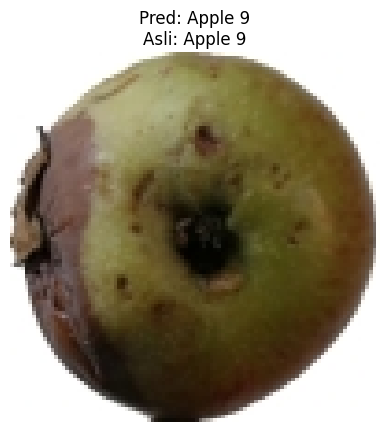

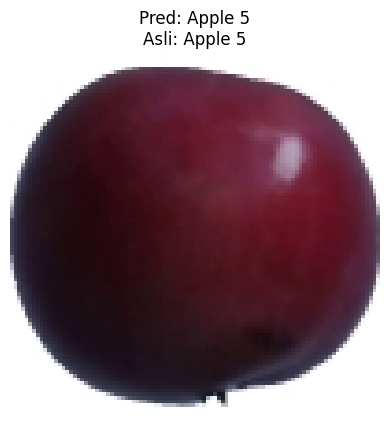

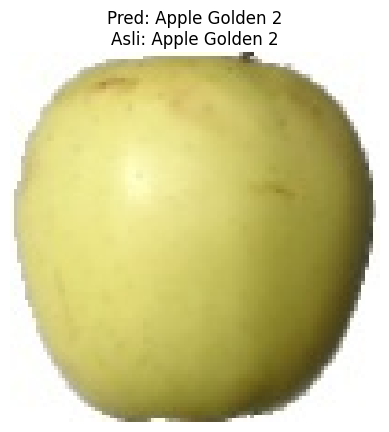

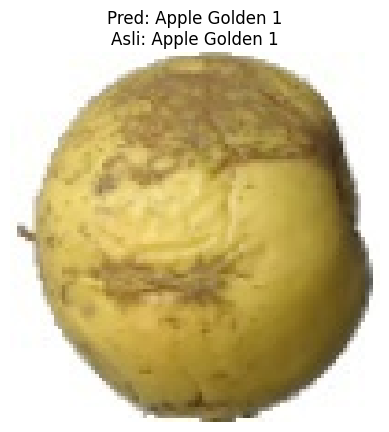

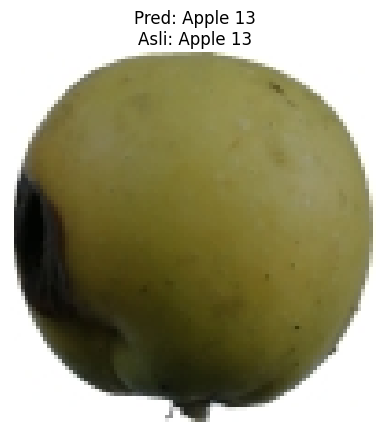

In [ ]:
# === Eksekusi ===
features, labels, image_paths = load_dataset(bins=8)

knn_model, X_test, y_test, y_pred, paths_test = train_and_evaluate_KNN(
    features=features,
    labels=labels,
    image_paths=image_paths,
    k=5
)

show_predictions(paths_test, y_test, y_pred, n=5)